# Tuto spisem, co vsetko mam
- Agresivita samce samice, ale neni dobry graf, uvidim co s nim
- Agresivita samce samice, ale celkom dobre
- Vlastnosti sterilizacia a pohlavie, dobre, ale nedokoncene
- Agresivita psov vs vek (este doplnit brechanie treba)
- nejaka blbost co odkladam
- Impulzivita a Nepozornost vs vek
- Strach vs vek
- Najtazsie a najlahsie plemena (mohol by som skusit spravit nejaku zavislost na agresivite v zavislosti od vekosti plemena)
- Agresivita vs Strach - zaujimave
- Agresivita vs citlivost na hluk
- Strach vs citlivost na hluk

### Napady
- 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown
# from google.colab import files
# uploaded = files.upload()

### Prikazy na stiahnutie z excelu a ulozenie do csv kvoli nacitavaniu
# dog_info = pd.read_excel("data-for-publication.xlsx", sheet_name="Information", header=0)
# dog_info.to_csv("psy_info.csv")
# files.download("psy_info.csv")

## Stiahnem data a ulozim ich v csv a vyrobim dataframe dogs a dogs info

In [3]:
dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")
# display(dogs.head())
dog_info = pd.read_csv("psy_info.csv", header=1)
# print(dogs.columns[10:100])


## Tuto budu zoznamy jednotlivych casti, a urobene casti tabulky podla kategorie


In [ ]:
dogs_demographic = dogs.transpose().iloc[0:11].transpose()
dogs_environment = dogs.transpose().iloc[11:42].transpose()
dogs_personality = dogs.transpose().iloc[42:112].transpose()
dogs_noise_sensitivity = dogs.transpose().iloc[112:154].transpose()
dogs_fearfullness = dogs.transpose().iloc[154:189].transpose()
dogs_aggression = dogs.transpose().iloc[189:214].transpose()
dogs_fear_surfaces = dogs.transpose().iloc[214:222].transpose()
dogs_separation_anxiety = dogs.transpose().iloc[222:232].transpose()
dogs_inattention = dogs.transpose().iloc[232:250].transpose()

environment = list(dogs_demographic.columns)
environment = list(dogs_environment.columns)
personality = list(dogs_personality.columns)
noise_sensitivity = list(dogs_noise_sensitivity.columns)
fearfullness = list(dogs_fearfullness.columns)
aggression = list(dogs_aggression.columns)
fear_surfaces = list(dogs_fear_surfaces.columns)
separation_anxiety = list(dogs_separation_anxiety.columns)
inattention = list(dogs_inattention.columns)

display(inattention)

### Pod tymto Agresivita, ale neni dobry ten graf, lebo neberie do uvahy mnozstvo samcov a samic
#### bud ho vyhodim alebo opravim

mnozstvo plemien: 52
mnozstvo samcov: 7237
mnozstvo samic: 8134


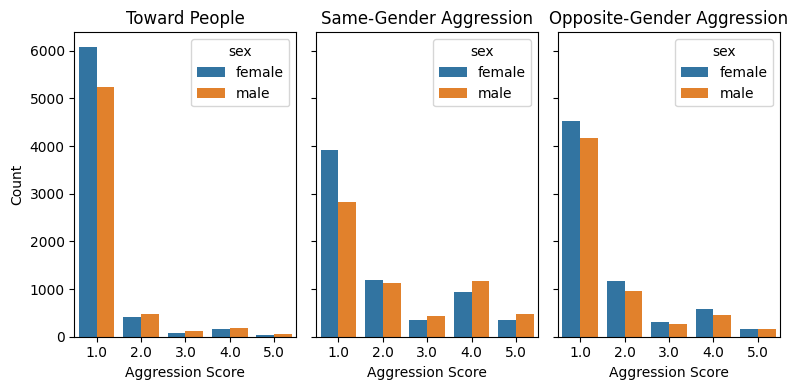

In [4]:
print('mnozstvo plemien:', len(dogs["breed_group"].unique()))
a = dogs.groupby("breed_group")["Aggressive_people"].mean(numeric_only=True)

## JEDNOTLIVE PLEMENA
# print("jednotlive plemena:")
# display(a.sort_values())

print('mnozstvo samcov:', len(dogs.query("sex=='male'")))
print('mnozstvo samic:', len(dogs.query("sex=='female'")))

male_count = len(dogs.query("sex=='male'"))
female_count = len(dogs.query("sex=='female'"))


plot, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True)

# dogs
sns.countplot(data=dogs, hue="sex", x='Aggressive_people', ax=axes[0])
axes[0].set(title='Toward People', xlabel='Aggression Score', ylabel='Count')

sns.countplot(data=dogs, hue="sex", x='Aggressive_dogs_samegender', ax=axes[1])
axes[1].set(title='Same-Gender Aggression', xlabel='Aggression Score', ylabel='Count')

sns.countplot(data=dogs, hue="sex", x='Aggressive_dogs_oppositegender', ax=axes[2])
axes[2].set(title='Opposite-Gender Aggression', xlabel='Aggression Score', ylabel='Count')

plot.tight_layout()
plt.show()

### Tento je dobry
#### tiez agresivita, samce vs samice, ale kompaktny

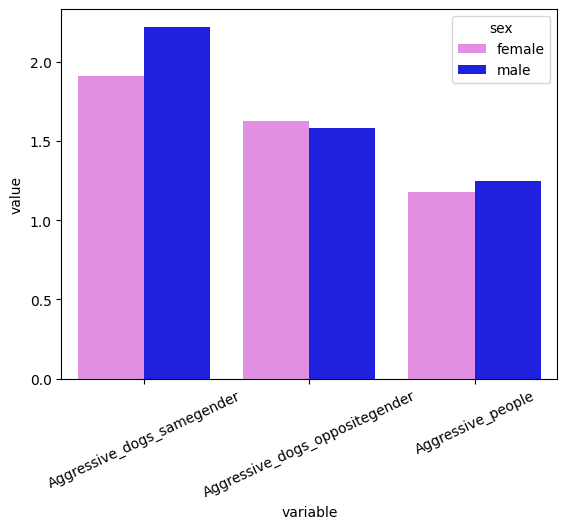

In [5]:

figure, axes = plt.subplots(1, 1)
agresivita_gender = dogs.groupby('sex')[['Aggressive_dogs_samegender', 'Aggressive_dogs_oppositegender', 'Aggressive_people']].mean().reset_index().melt(id_vars='sex')
# display(agresivita_gender)
sns.barplot(agresivita_gender, x='variable', y='value', hue='sex', palette={'male':'blue', 'female':'violet'})
axes.tick_params(axis='x', rotation=25)



### Tuto by som este chcel spravit ze to spravim pre cele tabulky, a zistim v ktorych veciach maju najvacsi rozdiel samce a samice
(ten barpraf dole)
nejak to odictat a zistit najvacsi rozdiel alebo nieco take

In [35]:
# display(dogs.query('sex=="male"').head())
# display(dogs.head())


kastracia_male = dogs.query('sex=="male"').groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[8:]
kastracia_male["sterilization_status"] = kastracia_male.index
kastracia_male.index.name = "index"
kastracia_male.columns.name = None
dogs_melted_male = (kastracia_male.melt(id_vars=["sterilization_status"]))
dogs_melted_male = dogs_melted_male.set_index("sterilization_status")

display(kastracia_male)
display(dogs_melted_male)

kastracia_female = dogs.query('sex=="female"').groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[26:36]
kastracia_female["sterilization_status"] = kastracia_female.index
kastracia_female.index.name = "index"
kastracia_female.columns.name = None
dogs_melted_female = (kastracia_female.melt(id_vars=["sterilization_status"]))
dogs_melted_female = dogs_melted_female.set_index("sterilization_status")

# display(kastracia_female)
# display(dogs_melted_female)


# print(kastracia_female.shape)
# print(kastracia_male.shape)

# figure, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
# sns.barplot(data=dogs_melted_male, x=dogs_melted_male.index, y="value", hue="variable", ax=axes[0])
# axes[0].tick_params(axis='x', rotation=35)
# axes[0].set_title("male")
# sns.barplot(data=dogs_melted_female, x=dogs_melted_female.index, y="value", hue="variable", ax=axes[1])
# axes[1].tick_params(axis='x', rotation=35)
# axes[1].set_title("female")


,intact,sterilized,sterilization_status
index,,,
Socialization_men,3.679197,3.607251,Socialization_men
Socialization_women,3.835563,3.829809,Socialization_women
Socialization_children,3.297509,3.136959,Socialization_children
Socialization_dogs,3.651983,3.676737,Socialization_dogs
Socialization_city,3.170434,3.172205,Socialization_city
...,...,...,...
Vas_13_cannotwait,1.677932,1.728220,Vas_13_cannotwait
impulsive,0.207214,0.248509,impulsive
impulsiveness_disturbes,1.892331,1.988593,impulsiveness_disturbes


,variable,value
sterilization_status,,
Socialization_men,intact,3.679197
Socialization_women,intact,3.835563
Socialization_children,intact,3.297509
Socialization_dogs,intact,3.651983
Socialization_city,intact,3.170434
...,...,...
Vas_13_cannotwait,sterilized,1.728220
impulsive,sterilized,0.248509
impulsiveness_disturbes,sterilized,1.988593


## Kastracia pokracovanie
idem skusit najst navacsie rozdiely po vykastrovani smca a vykastrovani samicky, a pripadne zistit co je celkovo najvacsia zmena medzi vykastrovanymi a nevykastrovanymi psami

In [36]:
kastracia_rozdiely_male = kastracia_male.copy(deep=True)
kastracia_rozdiely_male["diff"] = abs(kastracia_rozdiely_male["intact"] - kastracia_rozdiely_male["sterilized"])
kastracia_rozdiely_male["relative_diff"] = abs((kastracia_rozdiely_male["intact"] - kastracia_rozdiely_male["sterilized"])/kastracia_rozdiely_male["intact"])
display(kastracia_rozdiely_male.sort_values('diff', ascending=False).head(15))
display(kastracia_rozdiely_male.sort_values('relative_diff', ascending=False))

kastracia_rozdiely_female = kastracia_female.copy(deep=True)
kastracia_rozdiely_female["diff"] = abs(kastracia_rozdiely_female["intact"] - kastracia_rozdiely_female["sterilized"])
kastracia_rozdiely_female["relative_diff"] = abs((kastracia_rozdiely_female["intact"] - kastracia_rozdiely_female["sterilized"])/kastracia_rozdiely_female["intact"])


,intact,sterilized,sterilization_status,diff,relative_diff
index,,,,,
Sociable_dogs_oppositegender,4.413300,3.831851,Sociable_dogs_oppositegender,0.581448,0.131749
Greedy,2.911282,3.437102,Greedy,0.525820,0.180615
dog_sociability_score,0.251620,-0.260500,dog_sociability_score,0.512120,2.035289
Dog_enthusiastic,4.125474,3.680412,Dog_enthusiastic,0.445061,0.107881
Affectionate_dogs,3.165673,2.738880,Affectionate_dogs,0.426793,0.134819
Human_oriented,3.415440,3.840323,Human_oriented,0.424883,0.124401
noise_sensitivity_score,-0.124405,0.299823,noise_sensitivity_score,0.424229,3.410054
Firework_taillow,1.535872,1.952221,Firework_taillow,0.416349,0.271083
Firework_notice,3.957550,3.546966,Firework_notice,0.410585,0.103747


,intact,sterilized,sterilization_status,diff,relative_diff
index,,,,,
dog_aggression_score,-0.026036,0.330679,dog_aggression_score,0.356715,13.700887
stranger_aggression_score,-0.024370,0.271430,stranger_aggression_score,0.295799,12.138013
owner_aggression_score,0.017015,0.192090,owner_aggression_score,0.175075,10.289351
aggressiveness_dominance_score,0.030539,0.307607,aggressiveness_dominance_score,0.277069,9.072696
human_sociability_score,-0.008800,-0.080737,human_sociability_score,0.071937,8.175091
...,...,...,...,...,...
Socialization_car,3.859548,3.850957,Socialization_car,0.008591,0.002226
Socialization_women,3.835563,3.829809,Socialization_women,0.005754,0.001500
Predictable,4.180492,4.175299,Predictable,0.005193,0.001242


### Tuto je agresivita psov
##### ku psom, majitelom a cudzncom
podla veku 

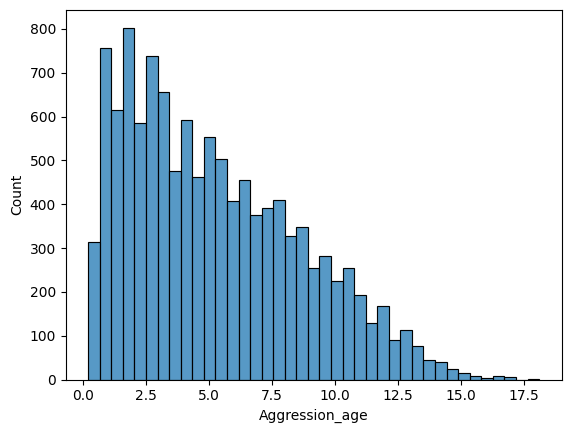

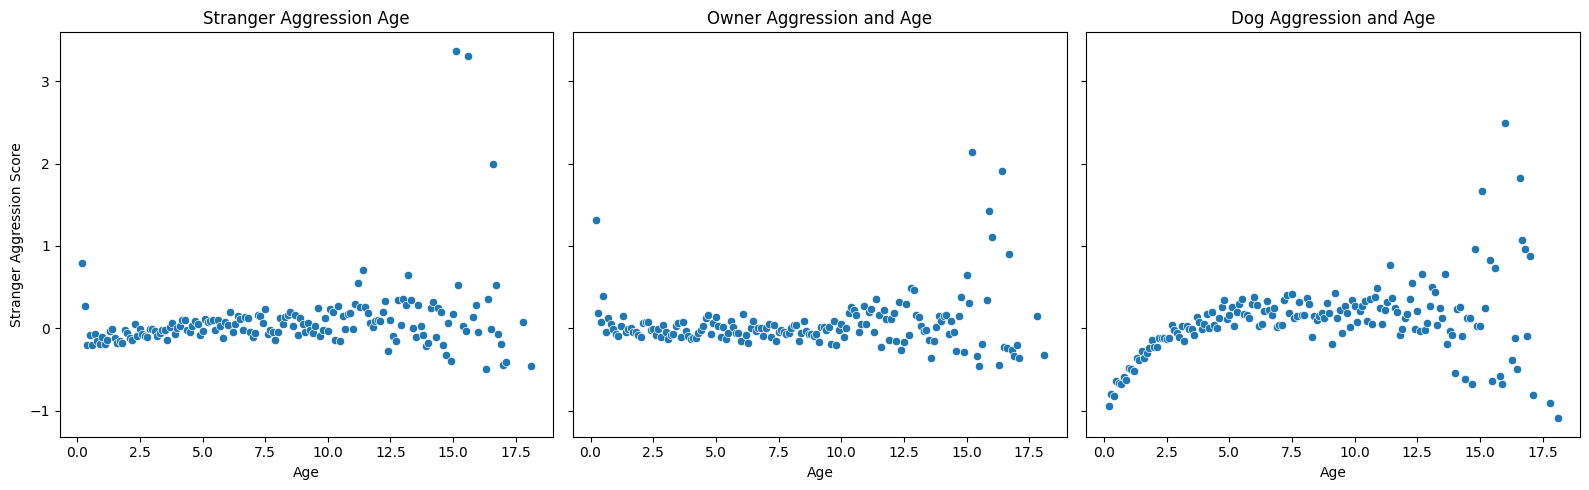

In [8]:
psy = dogs.copy(deep=True)
psy["Aggression_age"] = psy["Aggression_age"].round(1)
a = psy.groupby("Aggression_age")["stranger_aggression_score"].mean()
a = pd.DataFrame(a)

b = psy.groupby("Aggression_age")["owner_aggression_score"].mean()
b = pd.DataFrame(b)


c = psy.groupby("Aggression_age")["dog_aggression_score"].mean()
c = pd.DataFrame(c)


ax = sns.histplot(data=psy, x="Aggression_age")


figure, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
sns.scatterplot(x=a.index, y=a["stranger_aggression_score"], ax=axes[0])
axes[0].set_title("Stranger Aggression Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Stranger Aggression Score")

# Scatterplot 2
sns.scatterplot(x=b.index, y=b["owner_aggression_score"], ax=axes[1])
axes[1].set_title("Owner Aggression and Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Owner Aggression Score")

# Scatterplot 3
sns.scatterplot(x=c.index, y=c["dog_aggression_score"], ax=axes[2])
axes[2].set_title("Dog Aggression and Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Dog Aggression Score")

plt.tight_layout()
plt.show()


## Toto este odkladam

In [9]:
# kastracia_demographic = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[:12]
# kastracia_environment = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[12:43]
# kastracia_personality = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[43:113]
# kastracia_noise_sensitivity = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[113:155]
# kastracia_fearfullness = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[155:190]
# kastracia_aggression = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[190:215]
# kastracia_fear_surfaces = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[215:223]
# kastracia_fear_surfaces = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[223:233]
# kastracia_inattention = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[233:]

# kastracia_environment["sterilization_status"] = kastracia_environment.index
# kastracia_environment.index.name = "index"
# kastracia_environment.columns.name = None
# display(kastracia_environment)

# kastracia_personality["sterilization_status"] = kastracia_personality.index
# kastracia_personality.index.name = "index"
# kastracia_personality.columns.name = None
# display(kastracia_personality)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)

### Teraz spravim podobne impulzivitu a nepozornost
nasiel som jemnu zavislost, impulzivita stupa a vrcholi okolo 1 roka, potom pomaly klesa, nepozornost je na tom velmi podobne



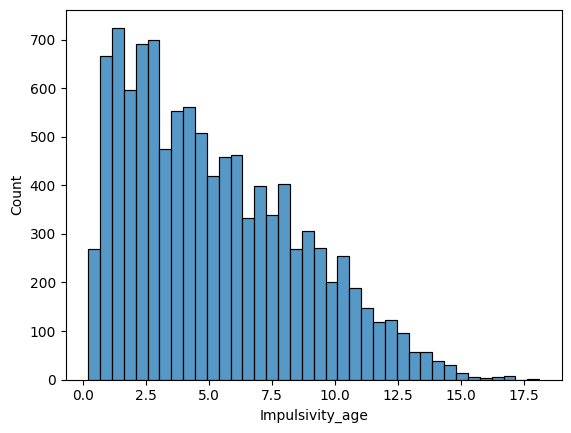

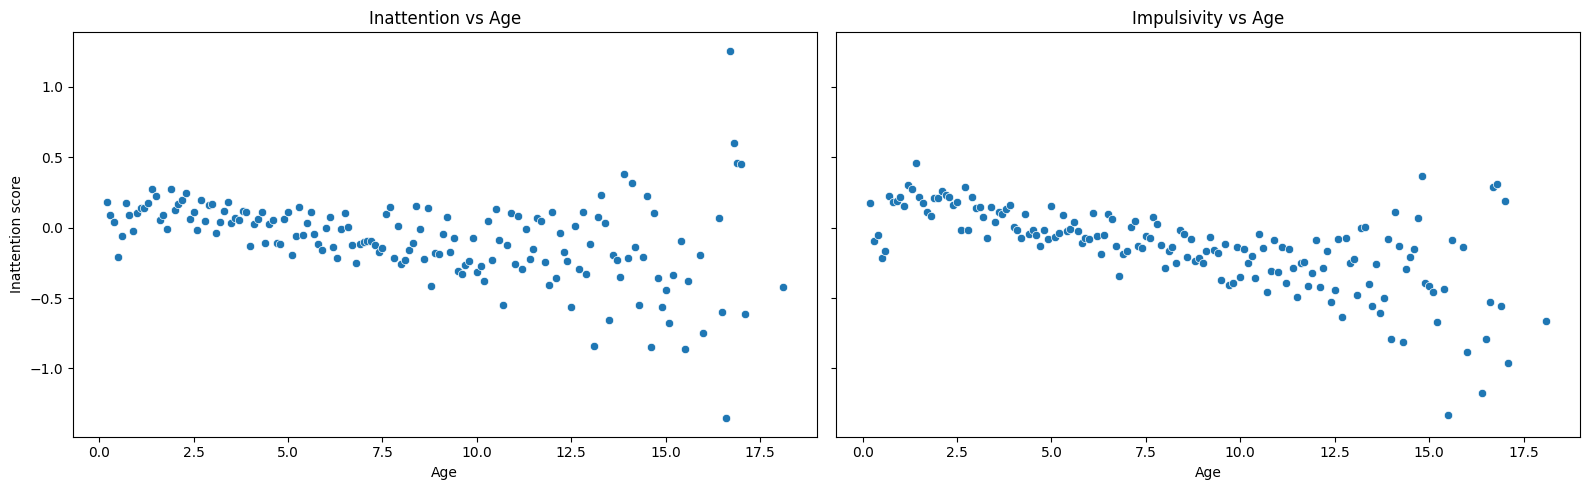

In [10]:
psy2 = dogs.copy(deep=True)
psy2["Impulsivity_age"] = psy2["Impulsivity_age"].round(1)
d = psy2.groupby("Impulsivity_age")["inattention_score"].mean()
d = pd.DataFrame(d)

e = psy2.groupby("Impulsivity_age")["impulsivity_score"].mean()
e = pd.DataFrame(e)

ax = sns.histplot(data=psy2, x="Impulsivity_age")

figure, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
sns.scatterplot(x=d.index, y=d["inattention_score"], ax=axes[0])
axes[0].set_title("Inattention vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Inattention score")

# Scatterplot 2
sns.scatterplot(x=e.index, y=e["impulsivity_score"], ax=axes[1])
axes[1].set_title("Impulsivity vs Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Impulsivity Score")

plt.tight_layout()
plt.show()

### Teraz spravim podobne strach
pri strachu ale nevidim ziadnu suvislost




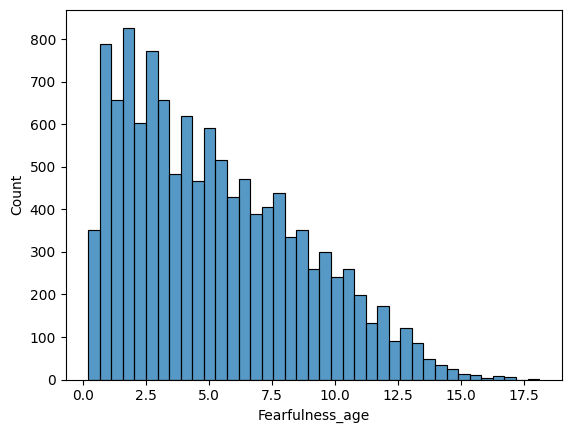

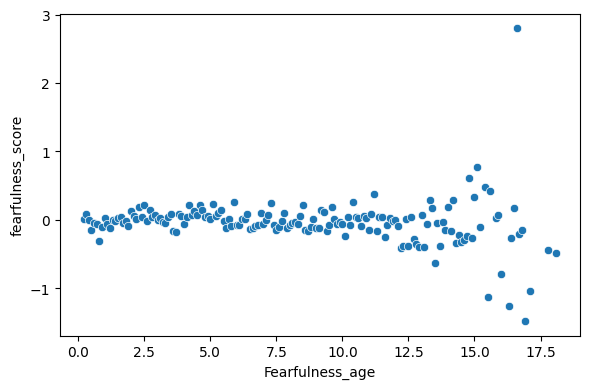

In [11]:
psy3 = dogs.copy(deep=True)
psy3["Fearfulness_age"] = psy3["Fearfulness_age"].round(1)
f = psy3.groupby("Fearfulness_age")["fearfulness_score"].mean()
f = pd.DataFrame(f)
ax = sns.histplot(data=psy3, x="Fearfulness_age")

figure, axes = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
sns.scatterplot(x=f.index, y=f["fearfulness_score"], ax=axes)

plt.tight_layout()
plt.show()



### Priemerne hmotnosti jednotlivych plemien barplot


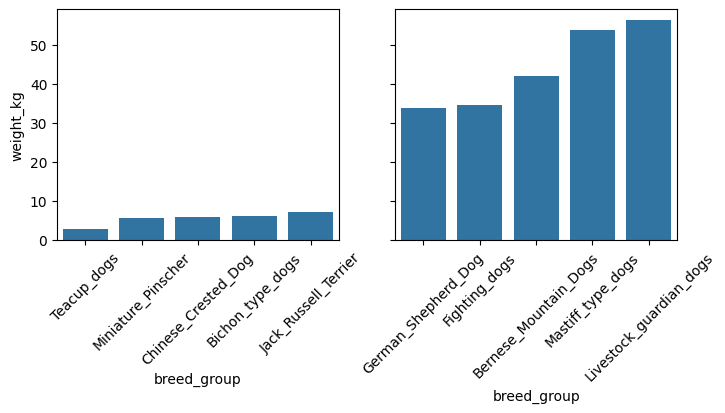

In [12]:

psy_hmostnost_max = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).head()
psy_hmostnost_min = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).tail()

figure, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
sns.barplot(data=psy_hmostnost_max, x=psy_hmostnost_max.index, y='weight_kg', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=psy_hmostnost_min, x=psy_hmostnost_min.index, y='weight_kg', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)


pocty_psov = pd.DataFrame(dogs.groupby("breed_group").count().sort_values(by="sex"))
# figure, axes1 = plt.subplots(1, 1)
# display(pocty_psov)
# sns.histplot(data=pocty_psov, ax=axes1)

### Teraz Spravim Agresivitu vs Strach

Text(0.5, 1.0, 'Barking Fearfulness')

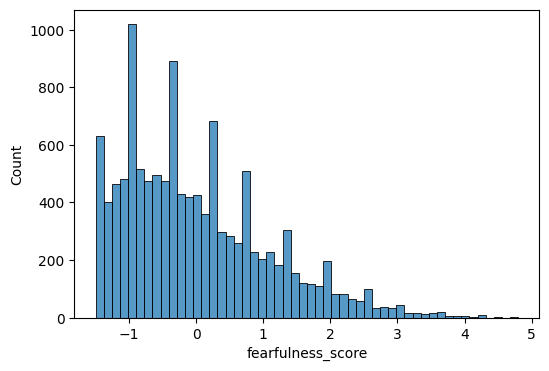

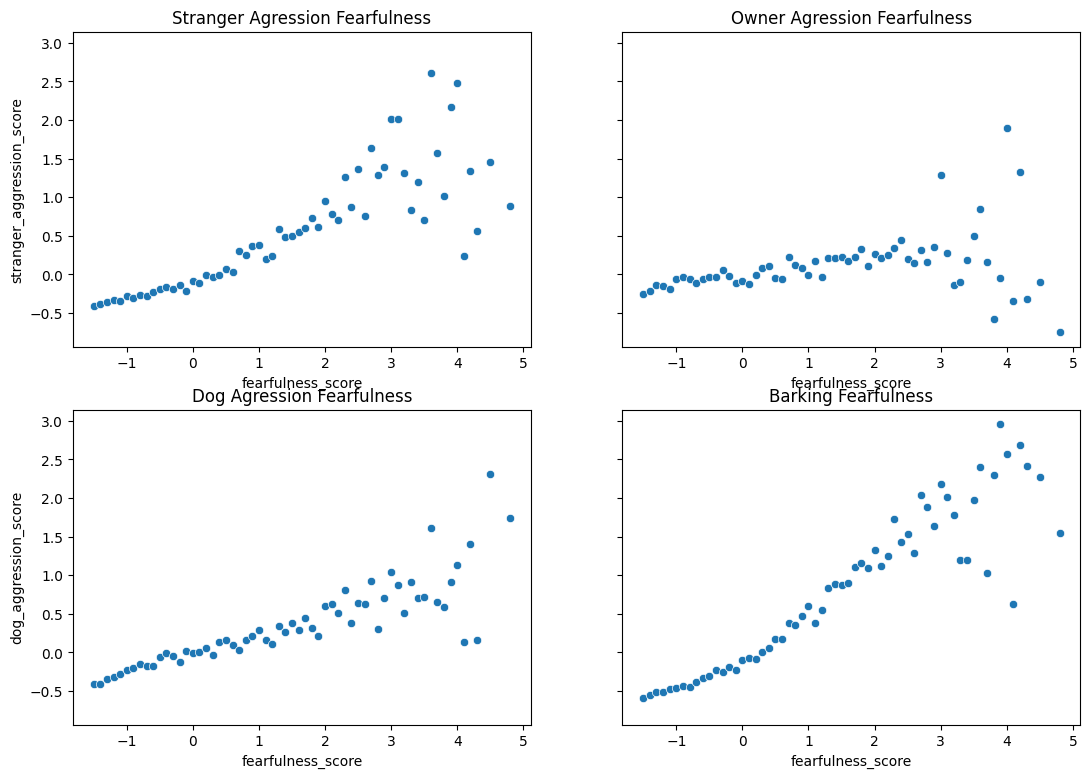

In [13]:

psy4 = dogs.copy(deep=True)
psy4["fearfulness_score"] = psy4["fearfulness_score"].round(1)

psy4_stranger = psy4.groupby("fearfulness_score")["stranger_aggression_score"].mean()
psy4_stranger = pd.DataFrame(psy4_stranger)
# display(psy4_stranger)

psy4_owner = psy4.groupby("fearfulness_score")["owner_aggression_score"].mean()
psy4_owner = pd.DataFrame(psy4_owner)
# display(psy4_owner)

psy4_dog = psy4.groupby("fearfulness_score")["dog_aggression_score"].mean()
psy4_dog = pd.DataFrame(psy4_dog)
# display(psy4_dog)

psy4_barking = psy4.groupby("fearfulness_score")["barking_score"].mean()
psy4_barking = pd.DataFrame(psy4_barking)
# display(psy4_barking)

figure, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
ax = sns.histplot(data=psy4, x="fearfulness_score")

figure, axes = plt.subplots(2, 2, figsize=(13, 9), sharey=True)
sns.scatterplot(x=psy4_stranger.index, y=psy4_stranger["stranger_aggression_score"], ax=axes[0][0])
axes[0][0].set_title("Stranger Agression Fearfulness")

sns.scatterplot(x=psy4_owner.index, y=psy4_owner["owner_aggression_score"], ax=axes[0][1])
axes[0][1].set_title("Owner Agression Fearfulness")

sns.scatterplot(x=psy4_dog.index, y=psy4_dog["dog_aggression_score"], ax=axes[1][0])
axes[1][0].set_title("Dog Agression Fearfulness")

sns.scatterplot(x=psy4_dog.index, y=psy4_barking["barking_score"], ax=axes[1][1])
axes[1][1].set_title("Barking Fearfulness")


### Citlivost na Hluk vs Agresivita

Text(0.5, 1.0, 'Barking vs noise sensitivity')

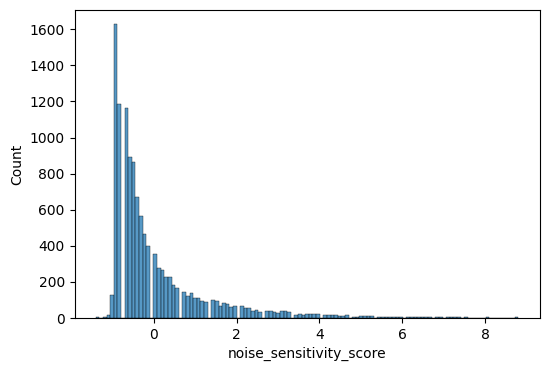

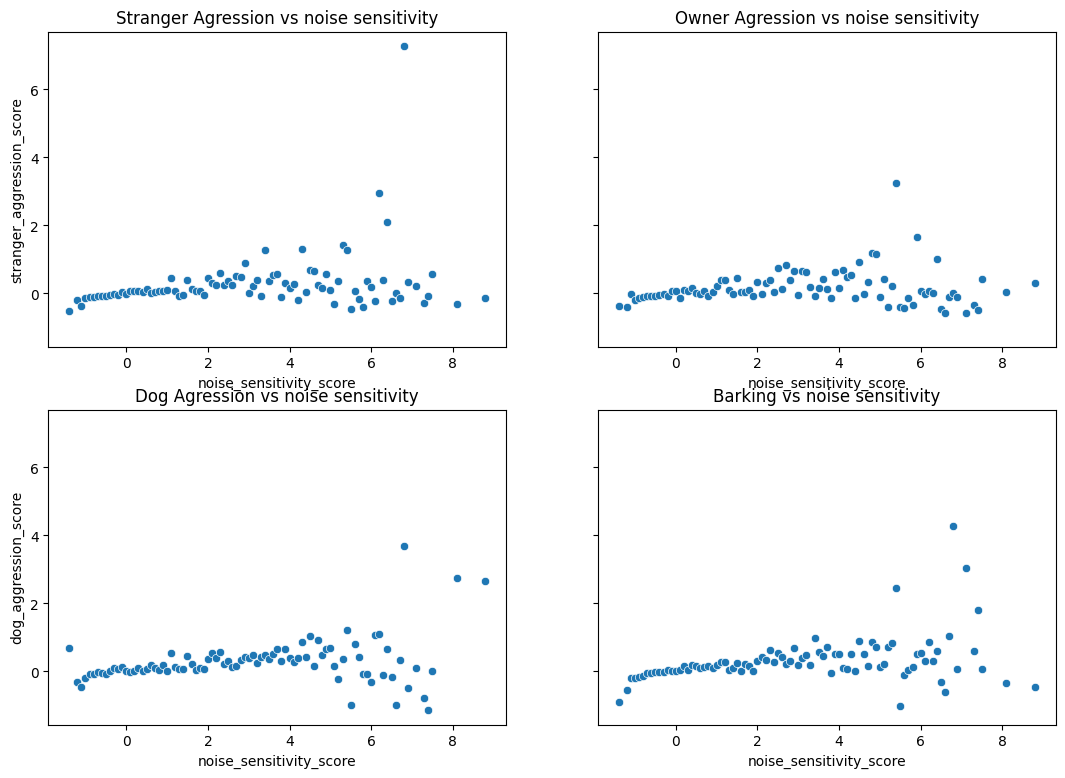

In [14]:

psy5 = dogs.copy(deep=True)
psy5["noise_sensitivity_score"] = psy5["noise_sensitivity_score"].round(1)

psy5_stranger = psy5.groupby("noise_sensitivity_score")["stranger_aggression_score"].mean()
psy5_stranger = pd.DataFrame(psy5_stranger)
# display(psy5_stranger)

psy5_owner = psy5.groupby("noise_sensitivity_score")["owner_aggression_score"].mean()
psy5_owner = pd.DataFrame(psy5_owner)
# display(psy5_owner)

psy5_dog = psy5.groupby("noise_sensitivity_score")["dog_aggression_score"].mean()
psy5_dog = pd.DataFrame(psy5_dog)
# display(psy5_dog)

psy5_barking = psy5.groupby("noise_sensitivity_score")["barking_score"].mean()
psy5_barking = pd.DataFrame(psy5_barking)
# display(psy5_barking)

figure, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
ax = sns.histplot(data=psy5, x="noise_sensitivity_score")

figure, axes = plt.subplots(2, 2, figsize=(13, 9), sharey=True)
sns.scatterplot(x=psy5_stranger.index, y=psy5_stranger["stranger_aggression_score"], ax=axes[0][0])
axes[0][0].set_title("Stranger Agression vs noise sensitivity")

sns.scatterplot(x=psy5_owner.index, y=psy5_owner["owner_aggression_score"], ax=axes[0][1])
axes[0][1].set_title("Owner Agression vs noise sensitivity")

sns.scatterplot(x=psy5_dog.index, y=psy5_dog["dog_aggression_score"], ax=axes[1][0])
axes[1][0].set_title("Dog Agression vs noise sensitivity")

sns.scatterplot(x=psy5_dog.index, y=psy5_barking["barking_score"], ax=axes[1][1])
axes[1][1].set_title("Barking vs noise sensitivity")

### Teraz strach vs citlivost na hluk

Text(0.5, 1.0, 'Fearfulness vs noise sensitivity')

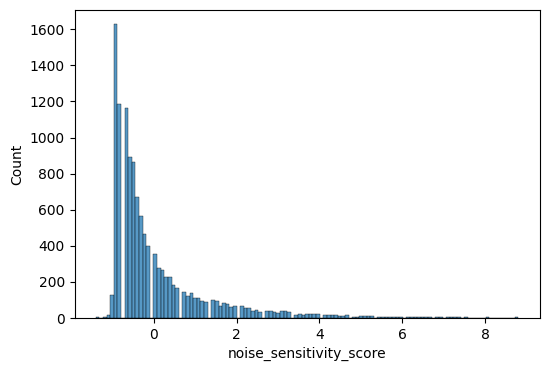

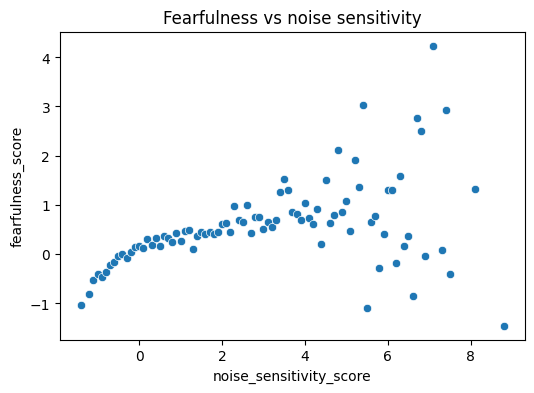

In [15]:
psy6 = dogs.copy(deep=True)
psy6["noise_sensitivity_score"] = psy6["noise_sensitivity_score"].round(1)

psy6_stranger = psy6.groupby("noise_sensitivity_score")["fearfulness_score"].mean()
psy6_stranger = pd.DataFrame(psy6_stranger)
# display(psy6_stranger)

figure, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
ax = sns.histplot(data=psy6, x="noise_sensitivity_score")

figure, axes = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
sns.scatterplot(x=psy6_stranger.index, y=psy6_stranger["fearfulness_score"], ax=axes)
axes.set_title("Fearfulness vs noise sensitivity")


### Este dokoncit tretiu agresivitu